# Project 7: Statistical Analysis and Hypothesis Testing

## By Kamala Priyadharshini R K

## Packages and setup

In [25]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [3]:
#Read data using pandas
user_df=pd.read_csv("C:/Users/Kamala/Cookie-Cats/cookie_cats.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [5]:
#Check for any missing values in the data using isnull() function
user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

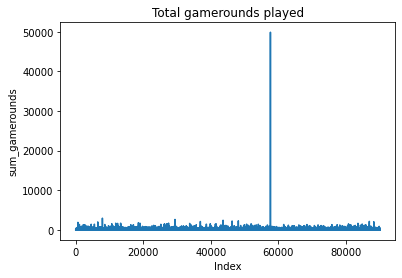

In [6]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [9]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier

print("max value of sum_gamerounds")
max_value=max(user_df.sum_gamerounds)
max_value
print("index of the max value")
index_value=user_df[user_df.sum_gamerounds.isin([max_value])].index.tolist()
index_value

user_df.drop(user_df.index[index_value],inplace=True)

max value of sum_gamerounds


49854

index of the max value


[57702]

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

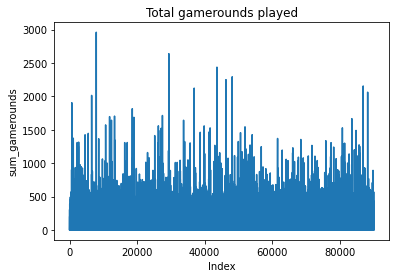

In [10]:
#Plot the graph for sum_gamerounds player after removing the outlier
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [14]:
#Insert calculation for 7-day retention rate

retention_rate_7=round((user_df.retention_7.sum()/user_df.shape[0])*100,2)
print("Overal 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")


Overal 7 days retention rate of the game for both versions is:  18.61 %


### Q2.2 How many players never played the game after installing? 

In [15]:
# Find number of customers with sum_gamerounds is equal to zero
user_df[user_df.sum_gamerounds==0].shape[0]


3994

### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'count of players')

Text(0.5, 1.0, 'count of players Vs sum_gamerounds')

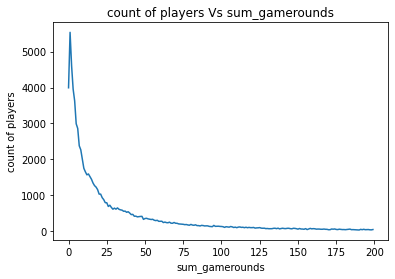

In [16]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart
new_data=user_df[["userid","sum_gamerounds"]].groupby("sum_gamerounds").count().reset_index().rename(columns={"userid":"count"})[0:200]
plt.xlabel("sum_gamerounds")
plt.ylabel("count of players")
plt.title("count of players Vs sum_gamerounds")
plt.plot(new_data["sum_gamerounds"],new_data["count"])

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [17]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    

    From the above results, the retention rate of the game after seven days is 19% for gate_30 and 18% for gate_40. There is no significant difference between the retention rate of the two versions of the game.Around 80% of the users do not play the game after seven days. 

### Q3.2 Gamerounds summary for different game versions

In [18]:
#use pandas group by to calculate average game rounds played summarized by different versions
user_df[["version","sum_gamerounds"]].groupby("version").agg("mean")

,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


In [19]:
user_df[(user_df.retention_7==True)&(user_df.version=="gate_40")].sum_gamerounds.mean()

165.6498369368281

<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 
    
    There is not any significant difference in the total number of gamerounds played based on the versions of the game.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [22]:
#Define A/B groups for hypothesis testing
#user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
user_df["version"]=user_df["version"].replace(["gate_30","gate_40"],["A","B"])
group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])

### Q4.1 Shapiro test of Normality

In [23]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
shapiro(group_A)

#test for group_B
shapiro(group_B)

ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)

ShapiroResult(statistic=0.48256540298461914, pvalue=0.0)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?
    
    As the p-value of group A and group B is 0(less than 0.5), the null hypothesis is rejected. Thus the distributions are not normal.

### Q4.2 Test of homegienity of variance

In [29]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results

stats.levene(group_A.sum_gamerounds, group_B.sum_gamerounds)


LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of Levene's test
    
    As the p-value is 0.78,the null hypothesis is accepted. Thus the two groups have equal variance.

### Q4.3 Test of significance: Two sample test

In [30]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis
stats.mannwhitneyu(group_A.sum_gamerounds,group_B.sum_gamerounds)



MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

In [32]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: The first sample is greater than the second sample

#Apply relevant two sample test to accept or reject the NULL hypothesis
stats.mannwhitneyu(group_A.sum_gamerounds,group_B.sum_gamerounds,alternative="greater")

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.02544577639572688)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of two sample hyothesis testing
    
    From the test to check wether the two samples are equal,we can reject the null hypothesis as the p-value is less then the alpha value(0.5).From the second mann-whitney u test,the null hypothesis is rejected as the p-value is less than 0.5. Thus the first sample(gate_30) is greater than the second sample(gate_40). 
    

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [33]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function


user_df[["version","retention_7","retention_1"]].groupby("version").agg("mean")

,retention_7,retention_1
version,,
A,0.190183,0.448198
B,0.182000,0.442283


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40
    
    From the above table, it can be seen that the rate of retention after seven days is higher in version A(gate_30).Therefore the placement of the first gate at level 30 would be recommended as its retention rate is higher.